# Feature Engineering

### Importing Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_feature = pd.read_csv("feature_data.csv")
df_feature

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


### Features Scaling & Transformation

#### Normalization

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
nor_scaled = MinMaxScaler()

In [5]:
nor_scaled.fit_transform(df_feature[["Salary"]])

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

#### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
sc.fit_transform(df_feature[["Salary"]])

array([[-0.77372619],
       [-0.09388309],
       [-0.4715737 ],
       [-0.35826652],
       [ 2.39887492],
       [        nan],
       [-0.49423514],
       [-0.20719028],
       [        nan]])

### Feature Encoding

#### LabelEncoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
enc = LabelEncoder()

In [11]:
enc.fit_transform(df_feature["Region"])

array([1, 0, 0, 2, 0, 1, 1, 1, 0])

In [12]:
enc.fit_transform(df_feature["Purchased"])

array([0, 1, 0, 0, 1, 1, 0, 1, 0])

#### OneHotEncoder

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
enc = OneHotEncoder()

In [15]:
enc.fit_transform(df_feature[["Region"]]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [16]:
enc.fit_transform(df_feature[["Purchased"]]).toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [17]:
pd.get_dummies(df_feature["Purchased"], drop_first=True)

,Yes
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0


### Missing Data

#### Handling  Missing Data

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp = SimpleImputer(strategy='mean')

In [20]:
df_feature

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [21]:
imp.fit_transform(df_feature[["Salary"]])

array([[ 3000.        ],
       [12000.        ],
       [ 7000.        ],
       [ 8500.        ],
       [45000.        ],
       [13242.85714286],
       [ 6700.        ],
       [10500.        ],
       [13242.85714286]])

#### Get the Missing Data

In [22]:
from sklearn.impute import MissingIndicator

In [23]:
ms = MissingIndicator()

In [24]:
ms.fit_transform(df_feature[["Salary"]])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

In [25]:
df_feature[ms.fit_transform(df_feature[["Salary"]])]

,First Name,Last Name,Age,Salary,Region,Purchased
5,Hesham,Naser,NaN,NaN,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


### Outliers

<AxesSubplot:>

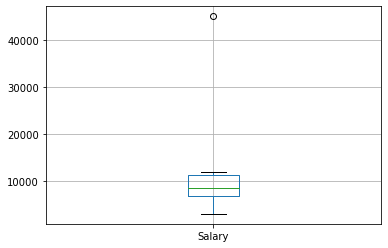

In [26]:
df_feature.boxplot("Salary")

In [27]:
q1 = df_feature["Salary"].quantile(0.25)
q1

6850.0

In [28]:
q3 = df_feature["Salary"].quantile(0.75)
q3

11250.0

In [29]:
iqr = q3 - q1
iqr

4400.0

In [30]:
min_out = q1 - 1.5 * iqr
min_out

250.0

In [31]:
max_out = q3 + 1.5 * iqr
max_out

17850.0

In [32]:
df_feature[(df_feature["Salary"] >= min_out) & (df_feature["Salary"] <= max_out)]

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes


### Importing Data from Sklearn

In [33]:
from sklearn.datasets import load_iris

In [34]:
df_iris = load_iris()

In [35]:
df_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [36]:
print(df_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
X = df_iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
y = df_iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Spliting for Training & Testing

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [42]:
X_train

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.7, 4.2, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.6, 3.2, 1.4, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.5, 5. , 2. ],
       [5.5, 4.2, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 2.2, 4. , 1. ],
       [5.4, 3. , 4.5, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [5.5, 2.3, 4. , 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 2.3, 3.3, 1. ],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.7, 3

In [43]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [44]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# Thanks